In [9]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier

In [12]:
svc = joblib.load('svc2.pkl')
scaler = joblib.load('scaler2.pkl')
classifier = BinaryClassifier(svc, scaler)

sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 11,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

new_frame1 = cv2.resize(imread("test/insect/Screenshot 2019-03-07 at 15.09.35.png"), (64, 64)) #1
new_frame2 = cv2.resize(imread("test/insect/Screenshot 2019-03-07 at 15.09.41.png"), (64, 64)) #1
new_frame3 = cv2.resize(imread("test/non_insect/Screenshot 2019-03-07 at 15.09.37.png"), (64, 64)) #1
new_frame4 = cv2.resize(imread("test/non_insect/Screenshot 2019-03-07 at 15.09.42.png"), (64, 64)) #1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [15]:
src = FeatureSourcer(sourcer_params, new_frame1)

src.new_frame(new_frame1)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame2)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame3)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

src.new_frame(new_frame4)
print(classifier.predict(src.slice(0, 0, 64, 64)), end = "")

1101

/usr/local/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.7/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
/usr/local/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.7/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecati

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.7/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


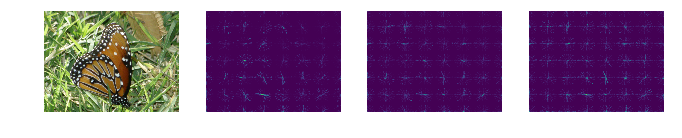

In [16]:
start_frame = imread("full_pics/original.jpeg?1532485827")
src.new_frame(start_frame)
rgb_img, a_img, b_img, c_img = src.visualize()
show_images([rgb_img, a_img, b_img, c_img], per_row = 4, per_col = 1, W = 10, H = 2)